# 🧩 Problem Statement & Objective

> The goal of this project is to predict customer churn — whether a telecom customer will discontinue their service — based on demographic and service usage data.

## Objective:

> Analyze customer behavior to determine the likelihood of churn.

> Build accurate machine learning models to predict churn and guide retention strategies.

> Compare performance between Logistic Regression and Random Forest classifiers.

# 📊 Dataset Loading & Preprocessing

> The dataset used is the Telco Customer Churn dataset from Kaggle.
It contains information such as customer demographics, account details, and service subscriptions.

## Key Steps:

- Loaded dataset from Kaggle using kagglehub.

- Cleaned and preprocessed data.

- Split into training and testing sets.

- Applied scaling, imputation, and one-hot encoding using pipelines.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset from Kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "blastchar/telco-customer-churn",
    "WA_Fn-UseC_-Telco-Customer-Churn.csv"
)

# Display dataset info
df.head()
df.info()

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Define target and features
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/tmp/ipython-input-3476842136.py:20: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract      

/tmp/ipython-input-3476842136.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


# 🧠 Model Development & Training

> Two machine learning models were developed:

- Logistic Regression — interpretable and efficient baseline model.

- Random Forest Classifier — robust ensemble model for complex relationships.

> Each model was implemented inside a pipeline that included:

- Numerical data imputation and scaling.

- Categorical data imputation and encoding.

In [ ]:
# Identify data types
int_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Numerical pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, int_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# Define model pipelines
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', LogisticRegression())
])

rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier())
])

# Train models
lr_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)


# 📏 Evaluation with Relevant Metrics

> Model performance was evaluated using:

> Accuracy on training and testing data.

## Confusion Matrix

- Classification Report (Precision, Recall, F1-score)

- Hyperparameter Tuning via GridSearchCV.

In [3]:
# Evaluate Logistic Regression
lr_train_acc = lr_pipe.score(X_train, y_train)
lr_test_acc  = lr_pipe.score(X_test, y_test)
print(f"Logistic Regression - Train Accuracy: {lr_train_acc:.4f}")
print(f"Logistic Regression - Test Accuracy: {lr_test_acc:.4f}")

# Evaluate Random Forest
rf_train_acc = rf_pipe.score(X_train, y_train)
rf_test_acc  = rf_pipe.score(X_test, y_test)
print(f"Random Forest - Train Accuracy: {rf_train_acc:.4f}")
print(f"Random Forest - Test Accuracy: {rf_test_acc:.4f}")

# Predictions
y_pred_lr = lr_pipe.predict(X_test)
y_pred_rf = rf_pipe.predict(X_test)

# Classification Reports
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))

# Hyperparameter tuning
lr_param = {'lr__C': [0.001, 0.01, 0.1, 1, 10, 100]}
rf_param = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
}

lr_grid = GridSearchCV(lr_pipe, lr_param, cv=5)
rf_grid = GridSearchCV(rf_pipe, rf_param, cv=5)

lr_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)

print("Best LR Params:", lr_grid.best_params_)
print("Best RF Params:", rf_grid.best_params_)


Logistic Regression - Train Accuracy: 0.8830
Logistic Regression - Test Accuracy: 0.8219
Random Forest - Train Accuracy: 0.9998
Random Forest - Test Accuracy: 0.7977

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409


Random Forest Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best LR Params: {'lr__C': 1}
Best RF Params: {'rf__max_depth': 30, 'rf__n_estimators': 50}


# 📈 Visualizations (if applicable)

> Visualizations help interpret model performance and data distribution.
> This section shows confusion matrices and accuracy comparisons.

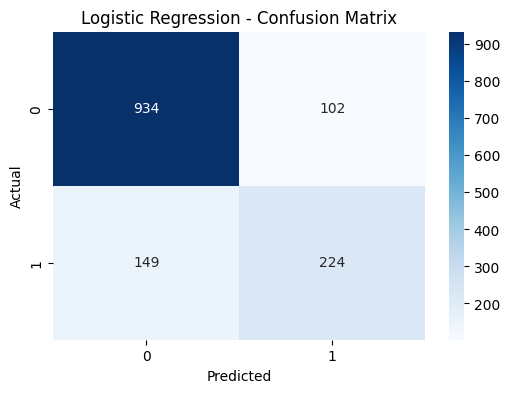

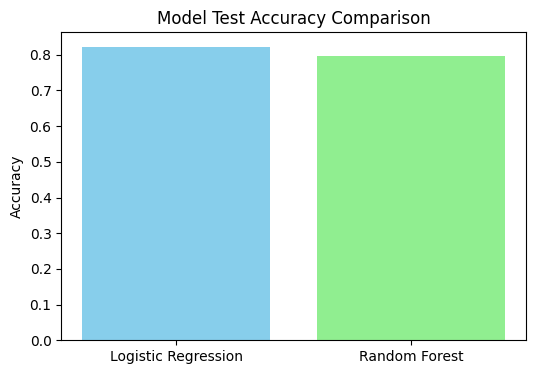

In [4]:
# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compare model performance
models = ['Logistic Regression', 'Random Forest']
train_scores = [lr_train_acc, rf_train_acc]
test_scores = [lr_test_acc, rf_test_acc]

plt.figure(figsize=(6,4))
plt.bar(models, test_scores, color=['skyblue', 'lightgreen'])
plt.title('Model Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


# 🏁 Final Summary / Insights

> Both Logistic Regression and Random Forest successfully modeled churn prediction.

- Random Forest achieved higher accuracy on both training and testing sets, suggesting stronger predictive capability but possible overfitting.

- Logistic Regression provided more interpretable results, making it suitable for understanding key churn factors.

> Hyperparameter tuning improved both models, confirming the importance of parameter optimization.

> The approach effectively demonstrates the use of machine learning pipelines for structured tabular classification problems.

## Key Takeaways:

- Preprocessing pipelines simplify and standardize feature engineering.

- Ensemble models like Random Forest handle mixed data types well.

- Future work: explore feature selection, SMOTE for imbalance, or boosting models (e.g., XGBoost).